In [1]:
import sklearn
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
from pathlib import Path
import sys

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pathlib import Path


# Create a Path object that represents the directory containing get_data.py
module_path = Path('pipelines/util')

# Convert the relative path to an absolute path and add it to sys.path
sys.path.append(str(module_path.resolve()))



# 0. Machine Learning Basics

Machine Learning is the study of computer algorithms that improve automatically through experience - Machine Learning, Tom Mitchell, McGraw Hill, 1997

#### Different types of machine learning:
-  Supervised Learning
    - eg. Regression, Classification
- Unsupervised Learning
    - eg. Clustering, Decision Tree
- Semi-Supervised Learning
- Reinforcement Learning

Interview Question: What's the difference between supervised and unsupervised learning?

#### A Typical Machine Learning Pipeline:
<img src="images/machine_learning_pipeline.png" />

Interview Question: What is a training/validation/test set?

# 1. Data

### 1.1 Load/Import Data

In [2]:
from util.get_data import get_trades, get_quotes
from pathlib import Path
import pandas as pd

# COMMENTS!!!! (every line for undergrads)
symbols_trades = ["DIA"]
start_date_trades = "2020-01-05"
end_date_trades = "2020-01-07"
row_limit_trades = "50"
get_trades(symbols_trades, start_date_trades, end_date_trades, row_limit_trades)

# Define the path to your trades CSV file
trades_path = Path(f"data/trades_{symbols_trades[0]}_{start_date_trades.replace('-', '')}-{end_date_trades.replace('-', '')}.csv")
# Read the CSV file into a pandas DataFrame
trades = pd.read_csv(trades_path)

# Example: Get info about trades and quotes DataFrames
trades.info()

ModuleNotFoundError: No module named 'util'

In [3]:
import sys
sys.path.append("../utils") # Add the utils directory to the system path

from get_data import get_trades, get_quotes

# Define the symbols, start date, end date, and row limit
symbols = ["QQQ"]
start_date = "2023-01-01"
end_date = "2023-08-01"
row_limit = 1000

# Get trades
get_trades(symbols, start_date, end_date, row_limit)

Output for symbol QQQ:
Errors for symbol QQQ:


In [5]:
import sys
sys.path.append("../utils") # Add the utils directory to the system path

from get_data import get_trades, get_quotes

symbols = ["QQQ"]
start_date = "2018-01-05"
end_date = "2018-01-06"
row_limit = 100
# Get quotes
get_quotes(symbols, start_date, end_date, row_limit)

Output for symbol QQQ:
Errors for symbol QQQ:


In [1]:
symbols_quotes = ["DIA"]
start_date_quotes = "2017-01-05"
end_date_quotes = "2017-01-06"
row_limit_quotes = "50"
get_quotes(symbols_quotes, start_date_quotes, end_date_quotes, row_limit_quotes)

# Define the path to your quotes CSV file for a specific symbol
quotes_path = Path(f"data/quotes_{symbols_quotes[0]}_{start_date_quotes.replace('-', '')}-{end_date_quotes.replace('-', '')}.csv")
# Read the CSV file into a pandas DataFrame
quotes = pd.read_csv(quotes_path)

quotes.info()

NameError: name 'get_quotes' is not defined

In [ ]:
from get_data import get_quotes

symbols = ["DIA", "AAPL"]
start_date = "2020-01-05"
end_date = "2020-01-10"
row_limit = "50"

get_quotes(symbols, start_date, end_date, row_limit)

|Trades Data|Description|
|---|---|
|Unnamed: 0 | dummy index |
|Time| Time the trade was published by SIP|
|Date| Date the trade was published |
|Exchange| The ID of the exchange where the trade took place|
|Symbol| Stock Symbol|
|Trade_Volume | The number of shares traded |
|Trade_Price | The share price of this trade |
|Sale_Condition | The special condition associated with the trade|
|Source_of_Trade | CTA/UTP |
|Trade_Stop_Stock_Indicator | CTA |
|Trade_Correction_Indicator |  |
|Sequence_Number | Message sequence number |
|Trade_Id | Identifier for tracking Trades. Unique per participant per symbol per session within a trading session |
|Trade_Reporting_Facility | The ID of the Trade Reporting Facility |
|Participant_Timestamp | Time when the trade was reported|
|Trade_Reporting_Facility_TRF_Timestamp | If from an Exchange or if the FINRA ADF does not have a proprietary quotation feed, then will be set to blank. If the FINRA ADF or a FINRA TRF provides a proprietary feed of its quotation information, then it’s set to be the time of the quotation|
|Trade_Through_Exempt_Indicator | Denotes whether or not a trade is exempt from Trade Through rules |

|Quotes Data|Description|
|---|---|
|Unnamed: 0 |  |
|Time| Time the quote was published by SIP|
|Exchange|The exchange that issued the quote |
|Symbol| Stock Symbol|
|Bid_Price | The highest price any buyer is willing to pay for shares of this security |
|Bid_Size | The maximum number of shares the highest bidder is willing to buy |
|Offer_Price |The lowest price any seller is willing to take for shares of this security |
|Offer_Size | The maximum number of shares available at the offer price|
|Quote_Condition | Determines whether a quote qualifies for the Best Bid and Best Offer calculation |
|Sequence_Number | message sequence numbers|
|National_BBO_Indicator | The effect this quote has on the NBBO |
|FINRA_BBO_Indicator | Indicates the effect this quote has on the FINRA BBO |
|FINRA_ADF_MPID_Indicator | Denotes  the type of appendage to be included |
|Quote_Cancel_Correction | Indicates that this record is a cancel or a correction of a previous quote|
|Source_Of_Quote | CTA or UTP |
|Retail_Interest_Indicator | Indicates the presence of Retail Price Improvement (RPI) interest between the Bid and the Offer |
|Short_Sale_Restriction_Indicator | Short Sale Restriction status |
|LULD_BBO_Indicator |  |
|SIP_Generated_Message_Identifier | Originator of the message |
|NBBO_LULD_Indicator | LULD Limit Price Band effect on the NBB and NBO |
|Participant_Timestamp | Time the quote was published by the Participant to the SIP |
|FINRA_ADF_Timestamp | A FINRA ADF- or a FINRA TRF-provided timestamp |
|FINRA_ADF_Market_Participant_Quote_Indicator | UTP - FINRA ADF Market Participant Quote Indicator representing the Top of book quotations for each FINRA ADF participant |
|Security_Status_Indicator |  |
|Date |  |
|YearMonth|  |

Note: All column information of trades and quotes data and valid entries for each column can be found at https://www.nyse.com/publicdocs/nyse/data/Daily_TAQ_Client_Spec_v3.0.pdf

In [11]:
pd.set_option('display.max_columns', None)
trades.head()

,Unnamed: 0,Time,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
0,0,2020-01-06 04:00:00.017754,2020-01-06,P,DIA,15,285.00,TI,C,N,0,41401,52983525027891,NaN,40000017591808,NaN,0
1,1,2020-01-06 04:00:00.040087,2020-01-06,P,DIA,6,284.25,TI,C,N,0,42301,52983525027894,NaN,40000039940608,NaN,0
2,2,2020-01-06 04:09:37.364256,2020-01-06,P,DIA,281,284.20,FT,C,N,0,45901,52983525027923,NaN,40937363898112,NaN,1
3,3,2020-01-06 04:09:37.364285,2020-01-06,T,DIA,500,284.20,FT,C,N,0,46001,3472338191832602203,NaN,40937363633707,NaN,1
4,4,2020-01-06 04:09:46.653987,2020-01-06,T,DIA,52,284.22,TI,C,N,0,46201,3472338191832602214,NaN,40946653359339,NaN,0


### 1.2 Data Visualization & Preliminary Analysis

In [7]:
from generators import *

In [10]:
plot_data = quotes.copy()
plot_data.drop(["Unnamed: 0"], axis=1, inplace=True)
plot_data.head()

,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
0,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
1,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
3,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
4,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


In [12]:
converted_PTS = convertParticipantTimestamp(plot_data['Participant_Timestamp'], plot_data["Date"])
plot_data.set_index(converted_PTS, inplace=True)
plot_data.head()
hours = plot_data.index.strftime("%H")

NameError: name 'plot_data' is not defined

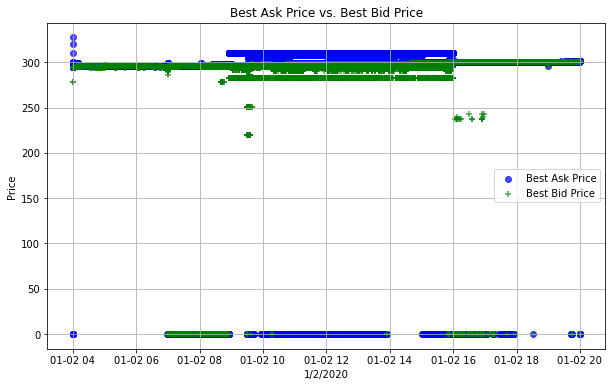

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(plot_data.index, plot_data['Offer_Price'], label='Best Ask Price', color='blue', alpha=0.7, marker='o')
plt.scatter(plot_data.index, plot_data['Bid_Price'], label='Best Bid Price', color='green', alpha=0.7, marker='+')
plt.grid(True)
plt.xlabel('1/2/2020')
plt.ylabel('Price')
plt.title('Best Ask Price vs. Best Bid Price')
plt.legend()
plt.grid(True)
plt.show()

### 1.3 Data Cleaning

Before we move towards feature generation and building machine learning models, we have to clean the dataset. The necessary steps to clean the trades and quotes data include:
1. Get rid of unnecessary columns.
2. Get rid of the invalid trades and quotes.
3. Event reconstruction.
4. Only keep the natural best bid/offer or last MQU.
5. Assign Last Active Quote and assign to the corresponding trade.

## SCIKIT-LEARN DESIGN

https://arxiv.org/pdf/1309.0238.pdf

Scikit-Learn’s API is remarkably well designed. These are the main design components of Scikit-Learn.

All objects share a consistent and simple interface:

### Estimators

Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a SimpleImputer is an estimator). The estimation itself is performed by the fit() method, and it takes a dataset as a parameter, or two for supervised learning algorithms—the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a SimpleImputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

### Transformers

Some estimators (such as a SimpleImputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a SimpleImputer. All transformers also have a convenience method called fit_transform(), which is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).


### Predictors

Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).

### ...

Reference to the base classes for all estimators in scikit-learn can be found at: https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/base.py#L153

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sortedcollections import OrderedSet
import time

In [9]:
class CleanData(BaseEstimator, TransformerMixin):
    
    def __init__(self, dropped_after_hours=True, droped_irregular_hours=True):
        self.dropped_after_hours = dropped_after_hours
        self.droped_irregular_hours = droped_irregular_hours
        
    
    def fit(self, X, y=None):
        if 'Participant_Timestamp' and 'Date' in X.columns:
            self.part_timestamp = convertParticipantTimestamp(X['Participant_Timestamp'], X['Date'])
        else:
            self.part_timestamp = X['Participant_Timestamp']
        return self
    
    
    def transform(self, X):    
        
        # remove rows of all NA
        X = X.dropna(axis=0, how="all")
        X.drop(['Unnamed: 0','Time', 'Date', 'YearMonth'], axis=1, inplace=True, errors='ignore')
        X['Participant_Timestamp'] = self.part_timestamp
        X.index = self.part_timestamp
       
        # drop after hours if specified
        if self.dropped_after_hours:
            after_idx = []
            for t in X.index:
                str_t = t.strftime("%H:%M:%S")
                if str_t < "09:00:00" or str_t > "16:00:00":
                    after_idx.append(t)
            X.drop(after_idx, inplace=True)
     
        
        # drop irregular hours if specified
        if self.droped_irregular_hours:
            irreg_idx = []
            for t in X.index:
                str_t = t.strftime("%H:%M:%S")
                if str_t < "09:15:00" or str_t > "15:45:00":
                    irreg_idx.append(t)
            X.drop(irreg_idx, axis=0, inplace=True)
        
        
        X = X.sort_index()
 
        return X

clean_pipeline = make_pipeline(
    CleanData()
)

clean_trades = clean_pipeline.fit_transform(trades)

clean_trades.head()

In [16]:
clean_quotes = clean_pipeline.fit_transform(quotes)
clean_quotes.head()

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator
2020-01-02 09:15:00.086755,X,AAPL,283.18,1.0,309.95,1.0,R,202469,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,NaN,NaN,
2020-01-02 09:15:08.271548,K,AAPL,296.06,1.0,296.33,1.0,R,202696,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,NaN,NaN,
2020-01-02 09:15:08.271574,Z,AAPL,295.37,3.0,296.82,2.0,R,202697,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,NaN,NaN,
2020-01-02 09:15:08.301537,K,AAPL,296.06,1.0,296.33,1.0,R,202699,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,NaN,NaN,
2020-01-02 09:15:08.301539,Z,AAPL,295.37,3.0,296.82,2.0,R,202698,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.301539,NaN,NaN,


### Reconstructing Events using pandas dataframe's append() method

In [17]:
clean_trades['Is_Quote'] = False
clean_quotes['Is_Quote'] = True

In [18]:
trade_features = ['Symbol', 'Trade_Volume', 'Trade_Price', 'Trade_Id', 'Trade_Reporting_Facility', 'Participant_Timestamp', 'Is_Quote']
quote_features = ['Symbol', 'Bid_Price', 'Bid_Size', 'Offer_Price', 'Offer_Size', 'Participant_Timestamp', 'Is_Quote']

In [19]:
all_events = clean_trades[trade_features].append(clean_quotes[quote_features], ignore_index=True)
all_events.index.name = "RID"

In [20]:
all_events.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size
RID,,,,,,,,,,,
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN
6,AAPL,50.0,296.15,1439.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN
7,AAPL,70.0,296.12,1440.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN
8,AAPL,100.0,296.12,1441.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN


In [21]:
len(all_events)

2001842

In [22]:
all_events = all_events.sort_values(by=['Participant_Timestamp', all_events.index.name])
all_events.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size
RID,,,,,,,,,,,
244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN
244032,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0
244033,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN


In [23]:
class PreprocessData(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return
        
    
    def fit(self, X, y=None):
        self.invalid_idx = []
        
        # invalid trades
        self.invalid_idx.extend(X[X['Trade_Price'] < 0].index) 
        self.invalid_idx.extend(X[X['Trade_Volume'] < 0].index)
        self.invalid_idx.extend(X[X['Trade_Reporting_Facility'] == 'D'].index)
        
        # invalid quotes
        self.invalid_idx.extend(X[X['Bid_Price'] < 0].index)
        self.invalid_idx.extend(X[X['Offer_Price'] < X['Bid_Price']].index)
        return self
    
    
    def transform(self, X):    
        
        #drop invalid trades and quotes
        X.drop(self.invalid_idx, inplace=True)
        
        #assign mox identifier
        X['MOX'] = generate_mox_identifier(X['Participant_Timestamp'])
        
        #labeling natural best bid/ask or LMQ as valid (True), otherwise False
        valid_quotes = ~X.duplicated(subset=['MOX'], keep='last')
        X['Valid_Quotes'] = X['Is_Quote'] & valid_quotes #Vectorization
        
        #assign trading directions
        X['Trade_Sign'] = generate_trade_side(X['Trade_Price'])
        
        #assign time in float (measure in seconds)
        X['Participant_Timestamp_f'] = X['Participant_Timestamp'].apply(lambda t : t.timestamp())
        
        return X

#### References: 

All preprossing steps are implemented according to the papaer: The Participant Timestamp: Get The Most Out Of TAQ Data https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3984827 

Trade direction is assigned using the tick test, which can be refered from the paper: Inferring Trade Direction from Intraday Data by Charles M. C. Lee, Mark J. Ready https://www.jstor.org/stable/2328845

#### *For labeling valid quotes using AND(&) operator:

|Is_Quote|valid_quotes|Desired|
|---|---|---|
|False|False|False|
|False|True|False|
|True|False|False|
|True|True|True|

In [24]:
preprocess_pipeline = make_pipeline(
    PreprocessData()
)

In [25]:
df_prepared = preprocess_pipeline.fit_transform(all_events)

In [26]:
df_prepared.head(20)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f
RID,,,,,,,,,,,,,,,
244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09
244032,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09
244033,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09


In [27]:
df_prepared[df_prepared['MOX'] == 11]

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f
RID,,,,,,,,,,,,,,,
6,AAPL,50.0,296.15,1439.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
7,AAPL,70.0,296.12,1440.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
8,AAPL,100.0,296.12,1441.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
9,AAPL,71.0,296.11,1442.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
244036,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,28.0,296.25,1.0,11,False,NaN,1.577957e+09
244037,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,27.0,296.25,1.0,11,False,NaN,1.577957e+09
244038,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,27.0,296.11,1.0,11,True,NaN,1.577957e+09


Visualize the pipeline

In [28]:
# import the set_config module from sklearn
from sklearn import set_config

# set the display option for sklearn to 'diagram'
set_config(display='diagram')

# display the pipeline 
preprocess_pipeline


Pipeline(steps=[('preprocessdata', PreprocessData())])

In [111]:
# df_prepared.to_csv("PreparedData.csv")

## 2. Feature Generation

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

In [41]:
from generators import *

In [30]:
import sys
sys.path.insert(1, '/testData')

## 2.1 Return and Imbalance

- $\small\text{VolumeAll}(T, \Delta_{1}, \Delta_{2}, M) = \sum_{\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)} V_t$
- $\small\text{Lambda}(T, \Delta_{1}, \Delta_{2}, M) = \frac{P_{max(I)} - P_{min(I)}}{\text{VolumeAll}(T, \Delta_1, \Delta_2, M)}$
- $\text{LobImbalance}(T, \Delta_1, \Delta_2, M) = \text{Average}[\frac{S^a_t - S^b_t}{S^a_t + S^b_t}, t \in \text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)]$
- $\text{TxnImbalance}(T, \Delta_1, \Delta_2, M) = \frac{\sum_{\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)} V_t\cdot Dir^{LR}_t}{\text{VolumeAll}(T, \Delta_1, \Delta_2, M)}$
- $\text{PastReturn}(T,\Delta_1,\Delta_2,M) = 1 - \frac{\text{Average}[P^{t\times n}_t:t \in I]}{P_{max(I)}}$

### 2.1.1 Calendar Mode

- $\small\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M) = \small\text{Int}^{back}(T-\Delta_{2}, T-\Delta_{1})$
- $(\Delta_{1}, \Delta_{2}) \in \{ (0,.1), (.1,.2), (.2,.4), ..., (12.8,25.6) \}$

In [29]:
sub_df = df_prepared.copy()[:30000]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [42]:
delta1, delta2 = 0, .1

#### VolumeAll

In [45]:
sub_df['cal_VolumeAll_0_.1'] = generate_cal_VolumeAll(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1
RID,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,8.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,9.0


#### Lambda

In [63]:
sub_df['cal_Lambda_0_.1'] = generate_cal_Lambda(sub_df, delta1, delta2, sub_df['cal_VolumeAll_0_.1'])
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1
RID,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.0,0.000000
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0,0.000000,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0,0.000000,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0,0.000000,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0,0.000000,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,8.0,0.012500,NaN,NaN
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.0,0.000000
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.2,-0.100000
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,9.0,0.011111,NaN,-0.100000


#### LobImbalance

In [61]:
sub_df['cal_LobImbalance_0_.1'] = generate_cal_LobImbalance(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1
RID,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.0,0.000000
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0,0.000000,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0,0.000000,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0,0.000000,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0,0.000000,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,8.0,0.012500,NaN,NaN
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.0,0.000000
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.2,-0.100000
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,9.0,0.011111,NaN,-0.100000


#### TxnImbalance

In [66]:
sub_df['cal_TxnImbalance_0_.1'] = generate_cal_TxnImbalance(sub_df, delta1, delta2, sub_df['cal_VolumeAll_0_.1'])
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1,Vt_Dir,cal_TxnImbalance_0_.1
RID,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.0,0.000000,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0,0.000000,NaN,NaN,4.0,4.0
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0,0.000000,NaN,NaN,1.0,1.0
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0,0.000000,NaN,NaN,-100.0,-100.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0,0.000000,NaN,NaN,7.0,7.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,8.0,0.012500,NaN,NaN,-1.0,6.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.0,0.000000,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.2,-0.100000,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,9.0,0.011111,NaN,-0.100000,-1.0,NaN


#### PastReturn

In [68]:
sub_df['cal_PastReturn_0_.1'] = generate_cal_PastReturn(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1,Vt_Dir,cal_TxnImbalance_0_.1,cal_PastReturn_0_.1
RID,,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.0,0.000000,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0,0.000000,NaN,NaN,4.0,4.0,0.000000
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0,0.000000,NaN,NaN,1.0,1.0,0.000000
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0,0.000000,NaN,NaN,-100.0,-100.0,0.000000
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0,0.000000,NaN,NaN,7.0,7.0,0.000000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,8.0,0.012500,NaN,NaN,-1.0,6.0,0.000169
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.0,0.000000,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.2,-0.100000,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,9.0,0.011111,NaN,-0.100000,-1.0,NaN,0.000225


### 2.1.2 Transaction Mode

- $\small\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M) = \{t: t \leq T, \Delta_{1} \leq (\sum_{s\in \small\text{Int(t,T)}}1_{\{V_s > 0\}}) < \Delta_2\}$
- $(\Delta_{1}, \Delta_{2}) \in \{ (0,1), (1,2), (2,4), ..., (128,256) \}$

In [84]:
sub_df = df_prepared.copy()[:30000]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [85]:
delta1, delta2 = 2, 4

#### VolumeAll

In [86]:
sub_df['trans_VolumeAll_2_4'] = generate_trans_VolumeAll(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,trans_VolumeAll_2_4
RID,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,5.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,101.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,107.0


#### Lambda

In [88]:
sub_df['trans_Lambda_2_4'] = generate_trans_Lambda(sub_df, delta1, delta2, sub_df['trans_VolumeAll_2_4'])
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,trans_VolumeAll_2_4,trans_Lambda_2_4
RID,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,5.0,0.000000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,101.0,0.000990
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,107.0,0.000935


#### LobImbalance

#### TxnImbalance

In [93]:
sub_df['trans_TxnImbalance_2_4'] = generate_trans_TxnImbalance(sub_df, delta1, delta2, sub_df['trans_VolumeAll_2_4'])
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,trans_VolumeAll_2_4,trans_Lambda_2_4,Vt_Dir,trans_TxnImbalance_2_4
RID,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN,NaN,4.0,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,NaN,1.0,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,NaN,-100.0,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,5.0,0.000000,7.0,1.000000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,101.0,0.000990,-1.0,-0.980198
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,107.0,0.000935,-1.0,-0.869159


#### PastReturn

In [95]:
sub_df['trans_PastReturn_2_4'] = generate_trans_PastReturn(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,trans_VolumeAll_2_4,trans_Lambda_2_4,Vt_Dir,trans_TxnImbalance_2_4,trans_PastReturn_2_4
RID,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN,NaN,4.0,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,NaN,1.0,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,NaN,-100.0,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,5.0,0.000000,7.0,1.000000,0.000000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,101.0,0.000990,-1.0,-0.980198,0.000169
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,107.0,0.000935,-1.0,-0.869159,0.000169


### 2.1.3 Volume Mode

- $\small\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M) = \{t: t \leq T, \Delta_{1} \leq (\sum_{s\in \small\text{Int(t,T)}}V_s) < \Delta_2\}$
- $(\Delta_{1}, \Delta_{2}) \in \{ (0,100), (100,200), (200,400), ..., (12800,25600) \}$

In [31]:
sub_df = df_prepared.copy()[:30000]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [32]:
sub_df = sub_df.reset_index(drop=True)

In [33]:
span = 100
sub_df['Volume_Span_100'] = generate_volume_span(span, sub_df['Trade_Volume'])
sub_df.head(15)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4


#### VolumeAll

In [34]:
vol_VolumeAll = []
for i in sub_df.index:
    cur, pre = i, sub_df.iloc[i]['Volume_Span_100']
    vol_VolumeAll.append(sub_df.iloc[pre:cur+1]['Trade_Volume'].sum())
sub_df['vol_VolumeAll_0_100'] = vol_VolumeAll

In [306]:
sub_df.head()

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0


In [309]:
vol_VolumeAll = []
for i in sub_df.index:
    cur, pre = sub_df.iloc[i]['Volume_Span_100'], sub_df.iloc[i]['Volume_Span_200']
    vol_VolumeAll.append(sub_df.iloc[pre:cur+1]['Trade_Volume'].sum())
sub_df['vol_VolumeAll_100_200'] = vol_VolumeAll

In [338]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667


#### Lambda

In [319]:
sub_df['vol_Lambda_0_100'] = generate_vol_lambda(sub_df,'Volume_Span_100', None, 'vol_VolumeAll_0_100')

In [322]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN


#### LobImbalance

In [329]:
sub_df['Imbalance'] = (sub_df['Offer_Size'] - sub_df['Bid_Size'])/(sub_df['Offer_Size'] + sub_df['Bid_Size'])

In [332]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0


In [335]:
sub_df['vol_LobImbalance_0_100'] = generate_vol_lobImbalance(sub_df, 'Volume_Span_100', None)

In [339]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667


#### TxnImbalance

In [340]:
sub_df['Vt_Dir'] = sub_df['Trade_Volume'] * sub_df['Trade_Sign']
sub_df.head()

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100,Vt_Dir
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.0,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.0,NaN,0.0,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.0,NaN,0.0,1.0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.0,NaN,NaN,-100.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.0,NaN,NaN,7.0


In [342]:
sub_df['vol_TxnImbalance_0_100'] = generate_vol_txnImbalance(sub_df, 'Volume_Span_100', None, 'vol_VolumeAll_0_100')

In [344]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100,Vt_Dir,vol_TxnImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000,NaN,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000,4.0,1.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000,1.0,1.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN,-100.0,-1.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN,7.0,1.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN,-1.0,0.750000
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000,NaN,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000,NaN,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000,-1.0,0.555556
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667,NaN,NaN


#### PastReturn

In [346]:
sub_df['vol_PastReturn_0_100'] = generate_vol_pastReturn(sub_df, 'Volume_Span_100', None)

In [348]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100,Vt_Dir,vol_TxnImbalance_0_100,vol_PastReturn_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000,NaN,NaN,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000,4.0,1.000000,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000,1.0,1.000000,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN,-100.0,-1.000000,0.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN,7.0,1.000000,0.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN,-1.0,0.750000,0.000169
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000,NaN,NaN,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000,NaN,NaN,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000,-1.0,0.555556,0.000225
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667,NaN,NaN,NaN
